In [91]:
#Importing libraries
import numpy as np
from matplotlib import pyplot as plt
import math

Discrete Fourier Transform

In [39]:
#Function to rotate the signal once place to the right
def r_rotate_one(arr):
    op = []
    op.append(arr[-1])
    for i in range(1,len(arr)):
        op.append(arr[i-1])
    return op

#Function for calculating the circular convolution
def circular_convo(x,h):
    y = []
    y.append(x)
    for i in range(len(x)-1):
        y.append(r_rotate_one(y[i]))

    y = np.transpose(np.array(y))
    result = np.dot(y,h)
    return result

In [102]:
#Function to calculate the DFT
def dft_x(x):
    x_k = []
    N = len(x)
    for i in range(N):
        s_r=0
        s_i=0
        for j in range(N):
            s_r += x[j]*np.cos((2*np.pi*i*j)/N) # Calculating the real part
            s_i += -1*x[j]*np.sin((2*np.pi*i*j)/N) # Calculating the imaginary part
        x_k.append((s_r,s_i)) # Appending both the parts a tuple
    return x_k
  
#Function to calculate the inverse DFT
def idft_x(x):
    x_n = []
    N = len(x)
    for i in range(N):
        s_r=0
        s_i=0
        for j in range(N):
            s_r += x[j][0]*np.cos((2*np.pi*i*j)/N) # Calculating the real part
            s_i += x[j][1]*np.sin((2*np.pi*i*j)/N) # Calculating the imaginary part
        x_n.append((s_r/N,s_i/N)) # Appending both the parts a tuple
    return x_n

# Function to conduct division of two complex number
def divc(a,b):
    return (a[0]*b[0] + a[1]*b[1])/(b[0]**2+b[1]**2),(a[1]*b[0]+a[0]*b[1])/(b[0]**2+b[1]**2)

#Function to calculate the energy of a signal
def energy_x(x):
    s=0
    for i in range(len(x)):
        s += np.power(x[i],2)
    return s

#Function to calculate the energy of the spectrum
def energy_f(x):
    s=0
    for i in range(len(x)):
        s += np.power(x[i][0],2)+np.power(x[i][1],2) # Magnitude square
    return s

#Function that returns the magnitude of the spectrum
def mag_dft(x):
    mag = []
    for i in range(len(x)):
        mag.append(math.sqrt(np.power(x[i][0],2)+np.power(x[i][1],2)))
    return mag

In [30]:
x = [1,2,3,0,0,0,0]
h = np.array([1,1,1,1,1,1,1])

result = circular_convo(x,h)
print(result)

[6 6 6 6 6 6 6]


/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


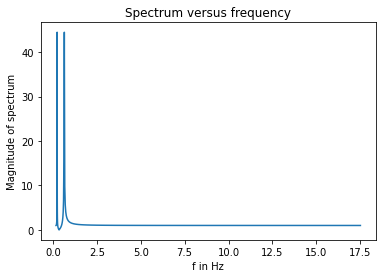

In [110]:
t = np.linspace(0,0.9,100)
f = (1/(2*np.pi))/t

#Generated cos(2pifct)
x_n = np.cos(2*np.pi*30*t)

#Computed the DFT of x[n]
x_k = dft_x(x_n)

#Computed the magnitude of the spectrum
mg = mag_dft(x_k)

plt.plot(f,mg)
plt.xlabel('f in Hz')
plt.ylabel('Magnitude of spectrum')
plt.title('Spectrum versus frequency')

plt.show()

In [90]:
x = [1,-3,1,5]
y = [7,-7,-9,-3]

x_k = dft_x(x)
y_k = dft_x(y)

#Calculating H[K] using Y[k]/X[k]
h_k = []
for i in range(len(x_k)):
    h_k.append(divc(y_k[i],x_k[i]))

#Calculating the inverse DFT to get h[n]
h_n = np.array(idft_x(h_k))

print(h_n[:,0])

[-0.45 -0.8  -0.95 -0.8 ]


In [86]:
n = np.arange(0,51)

#Getting the signal x[n]
x_n = []
for i in range(len(n)):
    x_n.append(np.power(3/4,n[i]))
    
#Calculating energy of x[n]
en_xn = energy_x(x_n)

#Find the DFT and calculating the energy of the spectrum
x_k = dft_x(x_n)
en_xk = energy_f(x_k)

#Relation between both the energies
print("Relation between energies of x[n] & X[K]: "+str(en_xn/en_xk))

Relation between energies of x[n] & X[K]: 0.01960784313725491


In [79]:
#Square wave from Assignment 3
def sq_x_n(n):
    y = []
    for i in range(len(n)):
        if (n[i]<=7 and n[i]>=0) or (n[i]>=16 and n[i]<=23):
            y.append(1)
        else:
            y.append(0)
    return y

/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


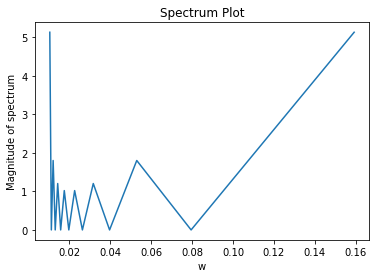

In [109]:
n = np.arange(0,16)
w = (1/(2*np.pi))/n

x_n = sq_x_n(n)

#Coefficients of DTFS are same as DFT of x[n]
c_n = np.array(dft_x(x_n))

#Computing the magnitude of the spectrum
mag = mag_dft(c_n)
    
plt.plot(w,mag)
plt.xlabel('w')
plt.ylabel('Magnitude of spectrum')
plt.title('Spectrum Plot')

plt.show()

Discrete Cosine Transform

In [94]:
#Function of cm
def c_m(k):
    if k==0:
        return (1/math.sqrt(2))
    else:
        return 1

#Function to compute the DCT
def dct_x(x):
    N = len(x)
    x_k = []
    for i in range(len(x)):
        s=0
        for j in range(N):
            s += x[j]*c_m(i)*np.cos(((2*j)+1)*((np.pi*i)/(2*N)))
        x_k.append(math.sqrt(2/N)*s)
    return x_k

#Function to compute the inverse DCT
def idct_x(x):
    N = len(x)
    x_k = []
    for i in range(N):
        s=0
        for j in range(N):
            s += x[j]*c_m(i)*np.cos(((2*j)+1)*((np.pi*i)/(2*N)))
        x_k.append(math.sqrt(2/N)*s)
    return x_k

#Function to calculate mean square error
def mean_sq_error(x_o,x_p):
    N = min(len(x_o),len(x_p))
    s=0
    for i in range(N):
        s += np.power(x_o[i]-x_p[i],2)
    return s/N

Enrgy of x[n] is 13056
Enrgy of X[4] is 13053.252307055178
Mean Square Error: 297.49320967377116


Text(0.5, 1.0, 'Inverse DCT Signal')

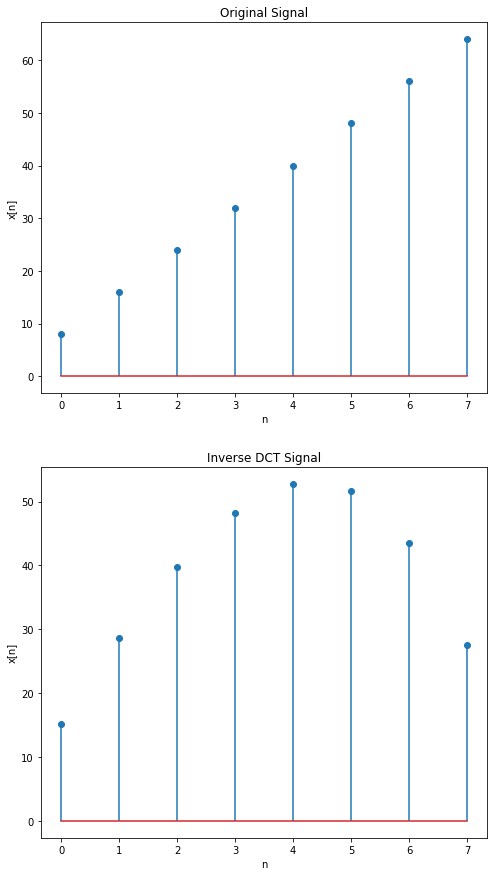

In [95]:
x = [8, 16, 24, 32, 40, 48, 56, 64]
n = np.arange(0,8)

#Computing energy of the signal
en_xn = energy_x(x)
print("Enrgy of x[n] is "+str(en_xn))

#Calculating DCT coefficients
x_k = dct_x(x)
#Keeping only the first four DCT coefficients
x_4 = x_k[0:4]

#Computing energy of the first 4 DCT coefficients
en_x4 = energy_x(x_4)
print("Enrgy of X[4] is "+str(en_x4))

#Reconstructing the original signal
x_n = idct_x(x_k)

#Calculating the mean square error
mse = mean_sq_error(x,x_n)
print("Mean Square Error: "+str(mse))

fig = plt.figure(figsize=(8,15))

plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Original Signal')

plt.subplot(2,1,2)
plt.stem(n,x_n)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Inverse DCT Signal')

Enrgy of x[n] is 13056
Enrgy of X[4] is 93184.0
Mean Square Error: 224.00000000000006


Text(0.5, 1.0, 'Inverse DFT Signal')

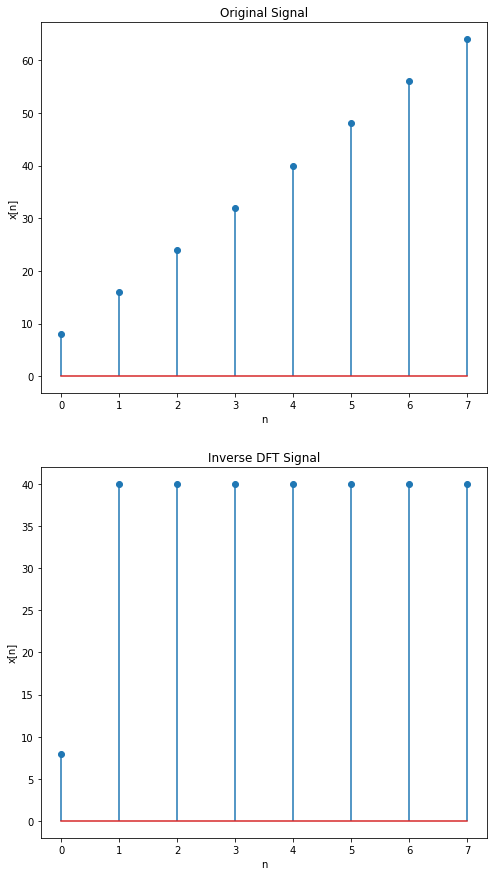

In [97]:
x = [8, 16, 24, 32, 40, 48, 56, 64]

#Computing energy of the signal
en_xn = energy_x(x)
print("Enrgy of x[n] is "+str(en_xn))

#Calculating DFT coefficients
x_k = dft_x(x)
#Keeping only the first four DFT coefficients
x_4 = x_k[0:4]

#Computing energy of the first 4 DFT coefficients
en_x4 = energy_f(x_4)
print("Enrgy of X[4] is "+str(en_x4))

#Reconstructing the original signal
x_n = np.array(idft_x(x_k))

#Calculating the mean square error
mse = mean_sq_error(x,x_n[:,0])
print("Mean Square Error: "+str(mse))

fig = plt.figure(figsize=(8,15))

plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Original Signal')

plt.subplot(2,1,2)
plt.stem(n,x_n[:,0])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Inverse DFT Signal')